In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting a default seed value
np.random.seed(40)
data_points = 1000
actual_weights = np.random.uniform(0,10,5)
# Linear regression data points
X = 2 * np.random.rand(data_points,5)
#y = 7 + np.sum([13,22,33,17,2] * X, axis=1) + np.random.randn(data_points)
y = 7 + np.sum(actual_weights * X, axis=1) + np.random.uniform(0,1,data_points)
print(actual_weights)
print(X.shape)
print(y.shape)


[4.07687028 0.5536604  7.88534877 2.87305185 4.50350587]
(1000, 5)
(1000,)


In [3]:
def gradient_descent(w,b,X,y,learning_rate,iterations): 
    m = y.shape[0]    
    # Gradient Descent
    cost_history = []
    for i in range(iterations):    
        # Prediction
        y_pred = X @ w + b
        # Gradients    
        dw = - (2/m) * X.T.dot(y - y_pred)
        db = - (2/m) * np.sum(y - y_pred)    
        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db    
        # Calculate Cost
        cost = np.mean((y - y_pred) ** 2)
        # Save cost history for plotting
        cost_history.append(cost)
        # Print cost every 100 iterations
        # if i % 100 == 0:                   
        #     print(f"Iteration {i}")
    #Final Weight and Bias
    print(f'Cost: {cost} Weight: {w}  Bias: {b}')
    return cost_history,w,b

## Observing impact of learning rate on cost convergence

Cost: 0.08168187139101032 Weight: [4.09257433 0.55338089 7.85234728 2.88073076 4.51501639]  Bias: 7.496592175934379
Cost: 0.15573200003614066 Weight: [4.29721469 0.74553944 8.05810644 3.09468955 4.71521417]  Bias: 6.410562029075101
Cost: 3.178083233118592 Weight: [4.55799607 2.83844644 6.36260498 3.90458332 4.85920064]  Bias: 4.621956422795867
Cost: 69.978411459246 Weight: [3.33008769 3.0739662  3.45542072 3.20590199 3.37248961]  Bias: 3.1206943620314305


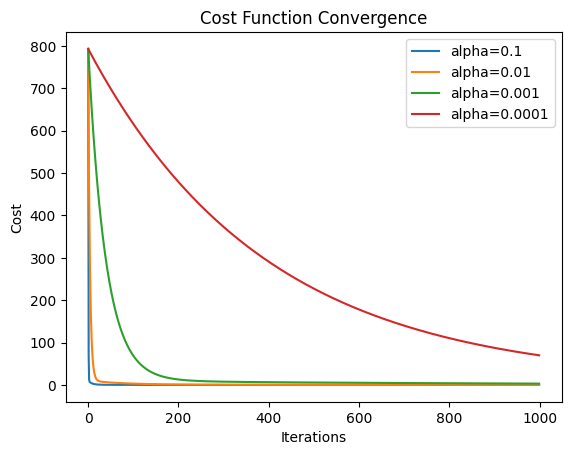

In [30]:
# Learning rate and iterations
learning_rate = [0.1,0.01,0.001,0.0001]
iterations = 1000
for rate in learning_rate:
    # Initialize weights and bias
    w = np.zeros(5)
    b = 0
    cost_history,w,b = gradient_descent(w,b,X,y,rate,iterations)
    # Plot the cost over iterations
    plt.plot(range(0,iterations), cost_history, label=f'alpha={rate}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.ticklabel_format(style='plain', axis='y')
plt.title(f'Cost Function Convergence')
#plt.yscale('log')
plt.legend()
plt.show()

## Observing impact of number of iterations on Cost Convergence

Cost: 792.9688422519912 Weight: [0.05909696 0.05618151 0.05933526 0.05748975 0.05952071]  Bias: 0.055032378056450844
Cost: 3.174448046629972 Weight: [4.55794862 2.83721308 6.36393998 3.9041346  4.85933169]  Bias: 4.622284111300976
Cost: 1.1542311549449682 Weight: [4.51808505 1.92394151 7.31704973 3.58042007 4.92810189]  Bias: 4.927585968413089
Cost: 0.5828232159192295 Weight: [4.48573681 1.43290399 7.77603085 3.41211076 4.92606939]  Bias: 5.195013721050312
Cost: 0.39233958538384683 Weight: [4.45542333 1.1612978  7.98810237 3.31647636 4.89784982]  Bias: 5.4317434800063
Cost: 0.3081992198309309 Weight: [4.42581862 1.00481645 8.07759835 3.25523796 4.86227404]  Bias: 5.64262020502321
Cost: 0.25829266839141374 Weight: [4.3970225  0.9095735  8.10700107 3.21085726 4.8268075 ]  Bias: 5.831168592420821
Cost: 0.2226909652206608 Weight: [4.36946547 0.84757313 8.10764991 3.1753658  4.7940599 ]  Bias: 6.000123808125153
Cost: 0.1951693467846895 Weight: [4.34352553 0.80416255 8.09520248 3.14515193 4.

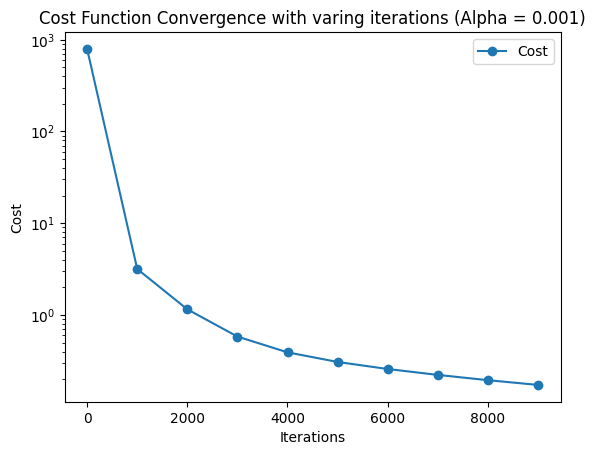

In [14]:
# Learning rate and iterations
learning_rate = 0.001
iterations = range(1,10001,1000)
final_cost_history_list = []
for iters in iterations:
    # Initialize weights and bias
    w = np.zeros(5)
    b = 0
    cost_history,w,b = gradient_descent(w,b,X,y,learning_rate,iters)
    final_cost_history_list.append(cost_history[-1])

# Plot the cost over iterations
plt.plot(iterations, final_cost_history_list, marker = 'o',label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.yscale('log')
plt.title(f'Cost Function Convergence with varing iterations (Alpha = 0.001)')
plt.legend()
plt.show()

## Testing model on new data

In [20]:
X_test = 2 * np.random.rand(data_points,5)
y_test = 7 + np.sum(actual_weights * X_test, axis=1) + np.random.uniform(0,1,data_points)

In [21]:
actual_weights

array([4.07687028, 0.5536604 , 7.88534877, 2.87305185, 4.50350587])

In [22]:
# Learning rate and iterations
learning_rate = 0.01
iterations = 100000

# Initialize weights and bias
w = np.zeros(5)
b = 0
history,w,b = gradient_descent(w,b,X,y,learning_rate,iterations)

Cost: 0.08168187107568511 Weight: [4.09256101 0.55336882 7.85233369 2.88071687 4.51500354]  Bias: 7.4966623689358505


In [24]:
print(f'Learned weights: {w} Learned Bias: {b}')
y_pred = X_test @ w + 7

cost = np.mean((y_test - y_pred) ** 2)
print(f'Cost: {cost}')

Learned weights: [4.09256101 0.55336882 7.85233369 2.88071687 4.51500354] Learned Bias: 7.4966623689358505
Cost: 0.33001470079727746


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [26]:
print("Learned weights:", model.coef_)
print("Learned bias:", model.intercept_)
print("Actual weights:", actual_weights)
print("Actual bias: 7")

Learned weights: [4.09256101 0.55336882 7.85233369 2.88071687 4.51500354]
Learned bias: 7.496662368936416
Actual weights: [4.07687028 0.5536604  7.88534877 2.87305185 4.50350587]
Actual bias: 7
